# Introduction / Background



## Which plants are better for bees: native or non-native?

### 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `species_num` | The number of different bee species in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plant. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

In [92]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into dataframe 'df'

df = pd.read_csv("data/plants_and_bees.csv")
df

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


## Data Cleaning

Meaning of variables and their type

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       1250 non-null   int64  
 1   species_num     1250 non-null   int64  
 2   date            1250 non-null   object 
 3   season          1250 non-null   object 
 4   site            1250 non-null   object 
 5   native_or_non   1250 non-null   object 
 6   sampling        1250 non-null   object 
 7   plant_species   1250 non-null   object 
 8   time            1250 non-null   int64  
 9   bee_species     1250 non-null   object 
 10  sex             1250 non-null   object 
 11  specialized_on  7 non-null      object 
 12  parasitic       1187 non-null   float64
 13  nesting         1196 non-null   object 
 14  status          15 non-null     object 
 15  nonnative_bee   1189 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 156.4+ KB


Deteriming the count of Null and Not Null values

In [94]:
def plant_bees_info():
    temp = pd.DataFrame(index=df.columns)
    temp["Datatype"] = df.dtypes
    temp["Not null values"] = df.count()
    temp["Null values"] = df.isnull().sum()
    temp["Percentage of Null values"] = (df.isnull().mean())*100
    temp["Unique count"] = df.nunique()
    return temp
plant_bees_info()

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
sample_id,int64,1250,0,0.00,80
species_num,int64,1250,0,0.00,34
date,object,1250,0,0.00,9
season,object,1250,0,0.00,2
site,object,1250,0,0.00,3
native_or_non,object,1250,0,0.00,2
sampling,object,1250,0,0.00,2
plant_species,object,1250,0,0.00,24
time,int64,1250,0,0.00,44
bee_species,object,1250,0,0.00,93


Dropping the columns 'specialized_on' and 'status'

In [95]:
df = df.drop(['specialized_on','status'], axis = 1)
print(df.isnull().sum())

sample_id         0
species_num       0
date              0
season            0
site              0
native_or_non     0
sampling          0
plant_species     0
time              0
bee_species       0
sex               0
parasitic        63
nesting          54
nonnative_bee    61
dtype: int64


Dropping all rows having null value in 'nonnative_bee' and 'parasitic' column

In [96]:
df_cleaned = df.dropna(subset=['nonnative_bee'])
df_cleaned = df.dropna(subset=['parasitic'])
df = df_cleaned
print(df.isnull().sum())

sample_id        0
species_num      0
date             0
season           0
site             0
native_or_non    0
sampling         0
plant_species    0
time             0
bee_species      0
sex              0
parasitic        0
nesting          5
nonnative_bee    0
dtype: int64


Replacing the null values in 'nesting' by global constant _'No nesting'_

In [97]:
df["nesting"].fillna("No nesting", inplace = True) 
df.nesting.unique()

array(['ground', 'hive', 'wood', 'parasite [ground]', 'wood/shell',
       'No nesting', 'wood/cavities'], dtype=object)

In [98]:
print(df.isnull().sum())

sample_id        0
species_num      0
date             0
season           0
site             0
native_or_non    0
sampling         0
plant_species    0
time             0
bee_species      0
sex              0
parasitic        0
nesting          0
nonnative_bee    0
dtype: int64


Dropping all the duplicate rows

In [99]:
x = df[df.duplicated()].shape[0]
print(f"Number of duplicate rows: {x}")

Number of duplicate rows: 578


In [100]:
df = df.drop_duplicates()
print(f"Shape: {df.shape}")

Shape: (609, 14)


Changing the data type of 'date' to _datetime_

In [101]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 1243
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sample_id      609 non-null    int64         
 1   species_num    609 non-null    int64         
 2   date           609 non-null    datetime64[ns]
 3   season         609 non-null    object        
 4   site           609 non-null    object        
 5   native_or_non  609 non-null    object        
 6   sampling       609 non-null    object        
 7   plant_species  609 non-null    object        
 8   time           609 non-null    int64         
 9   bee_species    609 non-null    object        
 10  sex            609 non-null    object        
 11  parasitic      609 non-null    float64       
 12  nesting        609 non-null    object        
 13  nonnative_bee  609 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 71.4+

Changing the data type of 'nonnative_bee' and 'parasitic' to _bool_

In [102]:
def convert_bool(val):
    return bool ( val )

In [103]:
df['nonnative_bee'] = df['nonnative_bee'].apply(lambda x: convert_bool(x))
df['parasitic'] = df['parasitic'].apply(lambda x: convert_bool(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 1243
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sample_id      609 non-null    int64         
 1   species_num    609 non-null    int64         
 2   date           609 non-null    datetime64[ns]
 3   season         609 non-null    object        
 4   site           609 non-null    object        
 5   native_or_non  609 non-null    object        
 6   sampling       609 non-null    object        
 7   plant_species  609 non-null    object        
 8   time           609 non-null    int64         
 9   bee_species    609 non-null    object        
 10  sex            609 non-null    object        
 11  parasitic      609 non-null    bool          
 12  nesting        609 non-null    object        
 13  nonnative_bee  609 non-null    bool          
dtypes: bool(2), datetime64[ns](1), int64(3), object(8)
memory usage: 63.0+ KB

In [104]:
plant_bees_info()

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
sample_id,int64,609,0,0.0,80
species_num,int64,609,0,0.0,34
date,datetime64[ns],609,0,0.0,9
season,object,609,0,0.0,2
site,object,609,0,0.0,3
native_or_non,object,609,0,0.0,2
sampling,object,609,0,0.0,2
plant_species,object,609,0,0.0,24
time,int64,609,0,0.0,44
bee_species,object,609,0,0.0,79


## Challenges

### 1. A visualization of the distribution of bee and plant species across one of the samples.

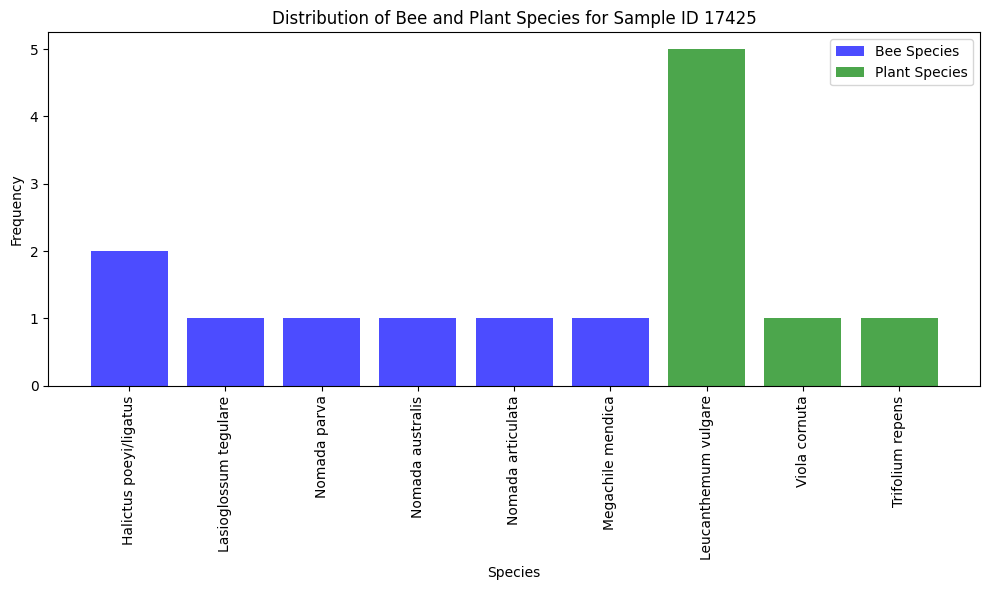

In [105]:
# Selecting the specific sample_id
selected_sample_id = 17425
selected_sample_data = df[df['sample_id'] == selected_sample_id]

# Counting bee and plant species occurrences in the selected sample
bee_species_counts = selected_sample_data['bee_species'].value_counts()
plant_species_counts = selected_sample_data['plant_species'].value_counts()

# Plotting the distribution of bee and plant species
plt.figure(figsize=(10, 6))
plt.bar(bee_species_counts.index, bee_species_counts.values, color='b', alpha=0.7, label='Bee Species')
plt.bar(plant_species_counts.index, plant_species_counts.values, color='g', alpha=0.7, label='Plant Species')
plt.xticks(rotation=90)
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title(f'Distribution of Bee and Plant Species for Sample ID {selected_sample_id}')
plt.legend()
plt.tight_layout()
plt.show()

### 2. Which plants are preferred by native vs non-native bee species?

#### Methodology / Approach
_To determine which plants are preferred by native and non-native bees, Random Forest Model was opted due to its robustness and accuracy._

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Data Preprocessing
label_encoder = LabelEncoder()

df['season'] = label_encoder.fit_transform(df['season'])
df['site'] = label_encoder.fit_transform(df['site'])
df['native_or_non'] = label_encoder.fit_transform(df['native_or_non'])
df['sampling'] = label_encoder.fit_transform(df['sampling'])
df['plant_species'] = label_encoder.fit_transform(df['plant_species'])
df['bee_species'] = label_encoder.fit_transform(df['bee_species'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df['nesting'] = label_encoder.fit_transform(df['nesting'])

In [107]:
# Split the data into training and testing sets
features = ['species_num', 'season', 'site', 'sampling', 'plant_species', 'time', 'bee_species', 'parasitic', 'nonnative_bee']
X = df[features]
y = df['native_or_non']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Random Forest Model Training
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [109]:
# Predicting native or non-native for plants
df['predicted_native_or_non'] = rf_classifier.predict(X)

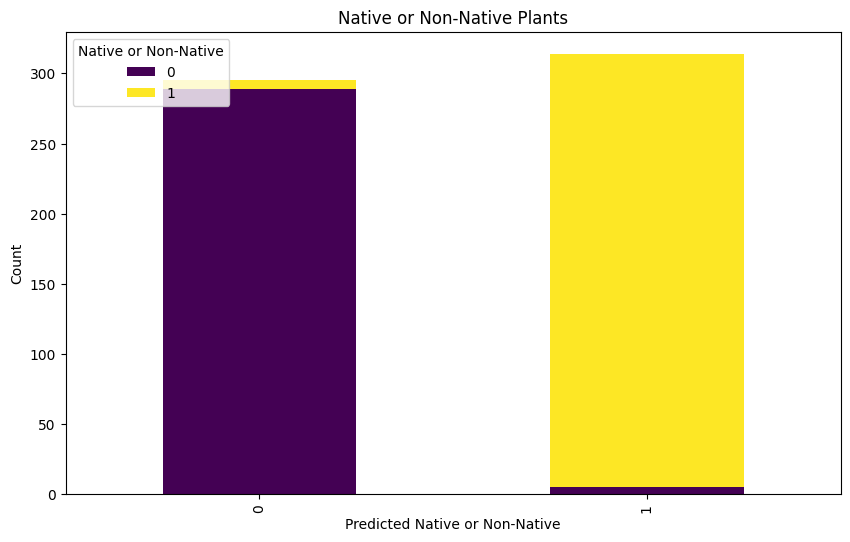

In [110]:
# Grouping the data by 'predicted_native_or_non' and 'native_or_non' to count occurrences
grouped_data = df.groupby(['predicted_native_or_non', 'native_or_non']).size().reset_index(name='count')

# Pivot the data for visualization
pivot_data = grouped_data.pivot('predicted_native_or_non', 'native_or_non', 'count').fillna(0)

# Plotting the grouped bar chart
pivot_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.xlabel('Predicted Native or Non-Native')
plt.ylabel('Count')
plt.title('Native or Non-Native Plants')
plt.legend(title='Native or Non-Native', loc='upper left')
plt.show()

In [111]:
# Model Evaluation
# Predict the native/non-native bee species for the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Feature Importance
# Extract the feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the important features
print("Features and their importance: ")
print(feature_importances)


Accuracy: 0.9098360655737705
Features and their importance: 
         Feature  Importance
0    species_num    0.415742
5           time    0.193095
4  plant_species    0.164332
6    bee_species    0.117241
2           site    0.052118
1         season    0.024648
3       sampling    0.017623
7      parasitic    0.010230
8  nonnative_bee    0.004970


The accuracy of the model is shown above. 

In [112]:
# Predictions
# Using the trained model to make predictions on the test set
y_pred = rf_model.predict(X_test)

# Create a DataFrame with the test set and the corresponding predictions
predictions_df = X_test.copy()
predictions_df['predicted_nonnative_bee'] = y_pred

# Plant species preferred by native bees
# Select the rows where the model predicts the bee species as native
preferred_by_native_bees = predictions_df[predictions_df['predicted_nonnative_bee'] == False]['plant_species'].unique()

# Plant species preferred by non-native bees
# Select the rows where the model predicts the bee species as non-native
preferred_by_nonnative_bees = predictions_df[predictions_df['predicted_nonnative_bee'] == True]['plant_species'].unique()

In [113]:
from sklearn.preprocessing import LabelEncoder
df2 = pd.read_csv('datacamp_workspace_export_2023-07-18 01_23_51.csv')

# Sample encoded data
encoded_data = df['plant_species']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the original data to establish the mapping
label_encoder.fit(df2['plant_species'])

# Use inverse_transform to decode the encoded data
decoded_data = label_encoder.inverse_transform(encoded_data)

# Fit the label encoder on the data to establish the mapping
label_encoder.fit(decoded_data)

# Access the original labels that were fitted to the encoded values
original_labels = label_encoder.classes_

mapping_dict = {encoded_val: original_label for encoded_val, original_label in zip(label_encoder.transform(original_labels), original_labels)}

In [114]:
# Display the results
print("Plant species preferred by native bees:")
plants_list_native = [mapping_dict[i] for i in preferred_by_native_bees]
print(plants_list_native)

print("\nPlant species preferred by non-native bees:")
plants_list_nonnative = [mapping_dict[i] for i in preferred_by_nonnative_bees]
print(plants_list_nonnative)


Plant species preferred by native bees:
['Asclepias tuberosa', 'None', 'Penstemon digitalis', 'Rudbeckia hirta', 'Helenium flexuosum', 'Pycnanthemum tenuifolium', 'Chamaecrista fasciculata', 'Monarda punctata']

Plant species preferred by non-native bees:
['None', 'Monarda punctata', 'Melilotus officinalis', 'Leucanthemum vulgare', 'Trifolium pratense', 'Cosmos bipinnatus', 'Lobularia maritima', 'Daucus carota', 'Coronilla varia', 'Agastache foeniculum', 'Helenium flexuosum', 'Trifolium repens']


_Using Random Forest Model, a list of plant species oreferred by native and non-native bees is obtained.
7 out of 8 were native plant species preferred by native bees. 
Whereas 10 out of 12 were non-native plants preferred by non-native bees_

### 3. Select the top three plant species you would recommend to the agency to support native bees.

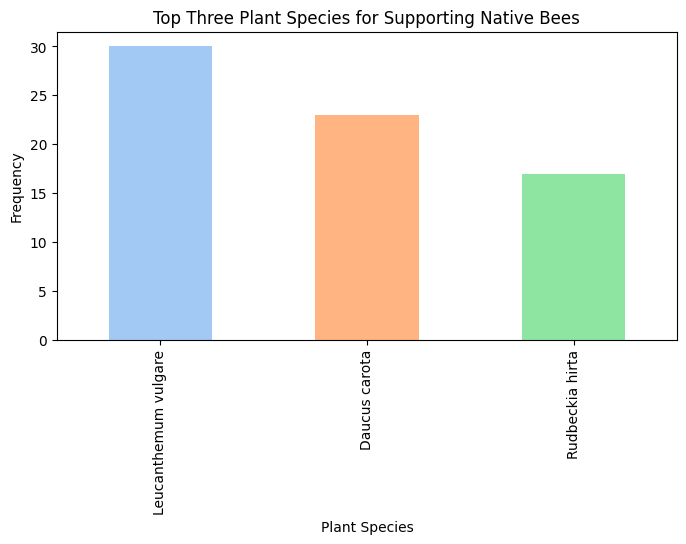

In [115]:
native_bees_df = df2[(df2['nonnative_bee'] == False) & (df2['plant_species'] != 'None')]
plant_species_counts = native_bees_df['plant_species'].value_counts()
top_three_species = plant_species_counts.head(3)
colors = sns.color_palette('pastel')

# Bar plot of the top three plant species
plt.figure(figsize=(8,4))
top_three_species.plot(kind='bar', color=colors)
plt.xlabel('Plant Species')
plt.ylabel('Frequency')
plt.title('Top Three Plant Species for Supporting Native Bees')
plt.xticks(rotation=90)
plt.show()

In [1]:
import jovian
jovian.commit(filename='eda_project')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.com/mehwish67/eda-project


'https://jovian.com/mehwish67/eda-project'

## Conclusion

To conclude, our study suggests that non-native plants can complement native pollinator friendly plantings, because they are visited by a broad spectrum of bees and buffer gaps in grassland native plant flowering times, particularly in early spring. However, non-native plants also alter the composition of plant communities, may not support as many specialist bees, and appear to affect individual and network specialization of bee communities with unknown consequences for plants and bees. Given the already severe alteration of our ecosystems as a result of anthropogenic activities worldwide, the use of selected non-native plants in meadows or flower strips along crop fields as food resources for bees and other pollinators can be considered a pragmatic possibility to partially compensate for the scarcity of natural habitats and native plants in landscapes heavily dominated by humans. We should, however, make sure to prevent the spread of non-native plant species to (semi-)natural areas, where they may disturb established natural plant and bee communities with unknown consequences for these ecosystems. We therefore suggest that non-native plants should only be included, with caution, in pollinator friendly plant mixes used in human-dominated landscapes and only when complementary to native pollinator friendly plants.

Reference: https://onlinelibrary.wiley.com/doi/full/10.1002/ece3.6826